In [1]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# To allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Creating an absolute path
import os
from pathlib import Path

download_path = Path.home() / "Downloads"
FILE = os.path.abspath(download_path / "rentals.csv")
rentals = pd.read_csv(FILE)

In [4]:
# Examining the first few rows of the data frame
rentals.head()

,id,name,host_id,host_name,neighborhood,room_type,price,minimum_nights,availability_365,number_of_reviews,average_reviews
0,3686,Vita's Hideaway,4645,Vita,Historic Anacostia,Private room,$55.00,2,365,75,3.38
1,3943,Historic Rowhouse Near Monuments,5059,Vasa,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room,$70.00,2,365,429,2.53
2,4197,Bedroom in DC 2 blocks to Metro,5061,Sandra,"Capitol Hill, Lincoln Park",Private room,$80.00,28,263,45,4.15
3,4529,Bertina's House Part One,5803,Bertina'S House,"Eastland Gardens, Kenilworth",Private room,$54.00,30,84,102,3.18
4,4967,"DC, Near Metro",7086,Seveer,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room,$99.00,2,233,31,2.76


In [5]:
# Examining the information behind the categorical variables of the data frame 
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5000 non-null   int64  
 1   name               4999 non-null   object 
 2   host_id            5000 non-null   int64  
 3   host_name          4989 non-null   object 
 4   neighborhood       5000 non-null   object 
 5   room_type          5000 non-null   object 
 6   price              5000 non-null   object 
 7   minimum_nights     5000 non-null   int64  
 8   availability_365   5000 non-null   int64  
 9   number_of_reviews  5000 non-null   int64  
 10  average_reviews    5000 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB


In [6]:
# Handling null values
rentals.fillna(0,inplace=True)

Text(-2.700000000000003, 0.5, 'Count')

Text(0.5, 6.79999999999999, 'Room Type')

Text(0.5, 1.0, 'Count of Rentals by Room Type')

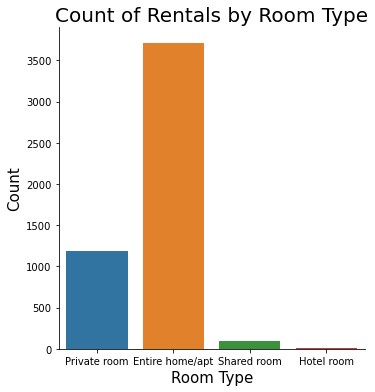

In [7]:
# The story we will be telling today through our analysis is that of the room type categorical variable
# By examining this variable, one of high importance, we will be able to determine other notable relationships
# To begin, we will use a count plot to discover the quantity of each type of room
sns.catplot(x='room_type', kind='count', data=rentals)
plt.ylabel('Count', fontsize='15')
plt.xlabel('Room Type',fontsize='15')
plt.title('Count of Rentals by Room Type',fontsize='20')

In [8]:
# To get greater accuracy for our quantity, we use this function to get an accurate count
rentals.room_type.value_counts()

# Confirming visualization in the plot of the most reoccuring value
rentals["room_type"].mode()

Entire home/apt    3714
Private room       1189
Shared room          90
Hotel room            7
Name: room_type, dtype: int64

0    Entire home/apt
dtype: object

Text(14.58958333333333, 0.5, 'Average Reviews')

Text(0.5, 6.79999999999999, 'Quantity')

Text(0.5, 1.0, 'Average Reviews for Rentals by Room Type')

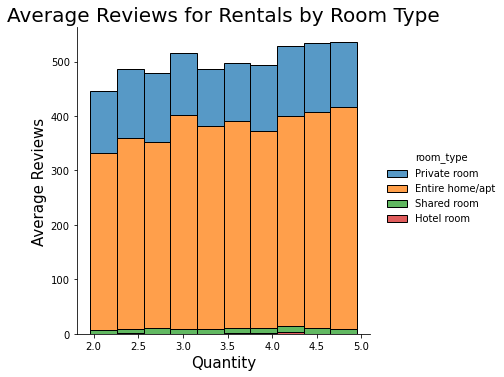

In [9]:
# From here we will use a histogram to examine any relationship between room type and average reviews
# It is apparent that 'Entire home/apt' has the most by a significant margin
# This makes sense as 'Entire home/apt' had the highest count in the previous plot, with 'Private room' second in both
sns.displot(rentals, x='average_reviews', bins=10, hue='room_type', multiple='stack')
plt.ylabel('Average Reviews', fontsize='15')
plt.xlabel('Quantity',fontsize='15')
plt.title('Average Reviews for Rentals by Room Type',fontsize='20')

In [10]:
# To get greater accuracy for our quantity, we use this function to get an accurate count
rentals.average_reviews.value_counts()

# Confirming visualization in the plot of the most reoccuring value
rentals["average_reviews"].mode()

# To get helpful numeric statistics regarding min/max, mean, quartiles etc.
rentals["average_reviews"].describe()

# To get the median, which can be a helpful comparison to the mean to look for possible skewness
rentals["average_reviews"].median()

# To get the skewness value, in this case average reviews is not skewed
rentals["average_reviews"].skew()

3.74    31
2.72    27
3.12    27
3.09    26
4.61    26
        ..
2.32     8
2.84     7
3.66     6
2.13     6
2.31     5
Name: average_reviews, Length: 300, dtype: int64

0    3.74
dtype: float64

count    5000.000000
mean        3.496486
std         0.865490
min         1.960000
25%         2.760000
50%         3.510000
75%         4.260000
max         4.950000
Name: average_reviews, dtype: float64

3.51

-0.043630446284440294

Text(8.21458333333333, 0.5, 'Quantity')

Text(0.5, 6.79999999999999, 'Minimum Nights')

Text(0.5, 1.0, 'Minimum Night Stay for Rentals by Room Type')

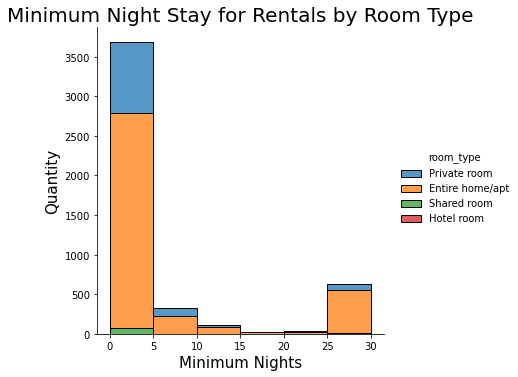

In [11]:
# Next we will use a histogram to examine the relationship between room type and minimum night stay
# It is apparent that the majortiy of minimums fall between 0-5 days
# While there is still a portion, although significantly less, that trickles in the 5-15 day span
# With another notable spike coming in the 25-30 day mark, being primarily 'Entire home/apt'
sns.displot(rentals, x='minimum_nights', 
            bins=[0,5,10,15,20,25,30],
            hue='room_type', multiple='stack')
plt.ylabel('Quantity', fontsize='15')
plt.xlabel('Minimum Nights',fontsize='15')
plt.title('Minimum Night Stay for Rentals by Room Type',fontsize='20')

In [12]:
# As can be seen below, this function displays the amount of values that repeatedly appear within the data column in descending order
# With days 1-5 being roughly 3800 of the 5000 records we can account for the high spike in the beginning of the graph
# Moreover, with 30 days having the 4th highest frequency, we can also account for the second spike in the latter half of the plot
rentals.minimum_nights.value_counts()

# Confirming visualization in the plot of the most reoccuring value
rentals["minimum_nights"].mode()

# Run this to get helpful numeric statistics regarding min/max, mean, quartiles etc.
rentals["minimum_nights"].describe()

# To get the median, which can be a helpful comparison to the mean to look for possible skewness
rentals["minimum_nights"].median()

# To get the skewness value, in this case average reviews is not skewed
rentals["minimum_nights"].skew()

# To get the mean absolute deviation, which in this case is roughly 2 weeks which is a pretty significant amount
rentals["minimum_nights"].mad()

2      1519
1      1184
3       749
30      556
4       235
5       159
7       123
28       64
14       59
10       42
6        40
90       37
180      26
15       26
60       25
20       20
21       13
70       12
13       11
120       9
29        7
365       6
150       6
91        6
25        5
56        5
31        5
45        4
270       4
8         3
12        3
360       3
75        3
27        3
9         3
300       2
40        2
85        2
65        2
61        1
110       1
55        1
35        1
23        1
182       1
32        1
170       1
58        1
600       1
100       1
50        1
160       1
18        1
185       1
356       1
179       1
Name: minimum_nights, dtype: int64

0    2
dtype: int64

count    5000.000000
mean       10.429000
std        28.639082
min         1.000000
25%         2.000000
50%         2.000000
75%         5.000000
max       600.000000
Name: minimum_nights, dtype: float64

2.0

8.283720180190244

13.013781199999292

Text(4.96458333333333, 0.5, 'Density')

Text(0.5, 6.79999999999999, 'Availability 365')

Text(0.5, 1.0, 'Availability of Rentals by Room Type')

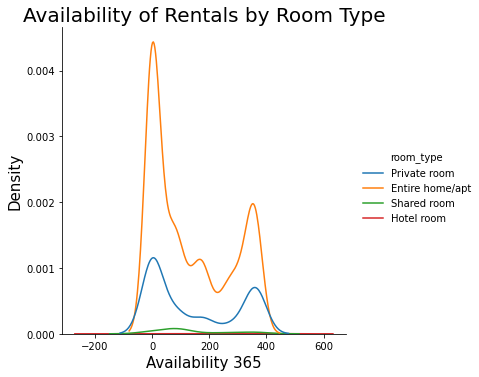

In [13]:
# Next we will be using a kernel density plot to examine the relationship between room type and availability throughout the year
# From this we can see the greatest availability for entire home, private room and shared room all peak around 0
# However both entire home and private room have a second spike right under 400, indicating yearly availability as a secondary high
sns.displot(rentals, x='availability_365', hue='room_type', kind='kde')
plt.ylabel('Density', fontsize='15')
plt.xlabel('Availability 365',fontsize='15')
plt.title('Availability of Rentals by Room Type',fontsize='20')

Text(3.674999999999997, 0.5, 'Availability 365')

Text(0.5, 6.79999999999999, 'Room Type')

Text(0.5, 1.0, 'Availability of Rentals by Room Type')

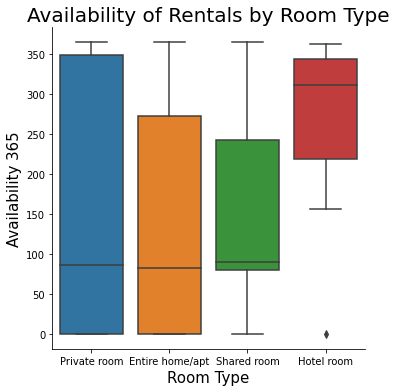

In [14]:
# Following the previous plot, we decided to run a box plot to get more in-depth information regarding the relationship between room type and availability
# As seen below, Private room, Entire home/apt, and Shared room all have a similar median at just under 100 days
# They also having interquartile ranges starting at almost the entire year, and decreasing by roughly 75 days towards the mean per variable, respectively. 
# With the three aforementioned variables all having the same min/max, the hotel room variable is the outlier
# Hotel room has a median roughly 200 days higher, with an interquartile range of roughly 100 days and a minimum of roughly 175 days
# This makes since as rentals for houses and private/shared rooms having sporadic availability, hotels almost always have some availability
sns.catplot(x='room_type', y='availability_365', kind='box', data=rentals)
plt.ylabel('Availability 365', fontsize='15')
plt.xlabel('Room Type',fontsize='15')
plt.title('Availability of Rentals by Room Type',fontsize='20')

In [15]:
# To get greater accuracy for our quantity, we use this function to get an accurate count
rentals.availability_365.value_counts()

# Confirming visualization in the plot of the most reoccuring value
rentals["availability_365"].mode()

# Run this to get helpful numeric statistics regarding min/max, mean, quartiles etc.
rentals["availability_365"].describe()

# To get the median, which can be a helpful comparison to the mean to look for possible skewness
rentals["availability_365"].median()

# To get the skewness value, in this case average reviews is not skewed
rentals["availability_365"].skew()

# To get the mean absolute deviation, which in this case is roughly 4 months which is a significant variability between room types
rentals["availability_365"].mad()

0      1787
365     396
364     107
89       94
90       86
       ... 
104       1
94        1
214       1
114       1
191       1
Name: availability_365, Length: 357, dtype: int64

0    0
dtype: int64

count    5000.000000
mean      135.583400
std       142.494144
min         0.000000
25%         0.000000
50%        87.000000
75%       283.000000
max       365.000000
Name: availability_365, dtype: float64

87.0

0.5400261531959021

128.0284445600006

In [8]:
# As can be seen below, none of the previous categorical variables we examined have a notable positive/negative correlation
rentals.corr()

,id,host_id,minimum_nights,availability_365,number_of_reviews,average_reviews
id,1.000000,0.182713,0.060250,0.023204,-0.383191,0.000725
host_id,0.182713,1.000000,-0.009985,-0.004961,-0.078809,-0.005087
minimum_nights,0.060250,-0.009985,1.000000,0.182223,-0.102591,0.012016
availability_365,0.023204,-0.004961,0.182223,1.000000,0.067516,0.025036
number_of_reviews,-0.383191,-0.078809,-0.102591,0.067516,1.000000,-0.031291
average_reviews,0.000725,-0.005087,0.012016,0.025036,-0.031291,1.000000
